# 1 - Traiter et classifier le sentiment de tweets 
- L'objectif de cet masterclass est d'appliquer les connaissances acquises du module de text mining sur une problématique de classification des sentiments de tweets.
- Vous allez travailler sur un jeu de données de 1.6 millions de tweets brutes labelisé 0 pour négatif et 4 pour positif.

- Charger le jeu de données "twitter_comment.csv" avec un encoding "ISO-8859-1" dans la variable df.
- Afficher les 5 premières lignes.

In [1]:
import pandas as pd

# préparation de l'affichage des dataframes

dico_pd_option = {
    'display.max_rows': 100,    # nbre max de lignes 
    'display.max_column': 50,  # nbre max de colonnes
    'display.width': 400,       # largeur lignes 
    'display.precision': 2,     # precision des valeurs
    'display.max_colwidth': 400  # largeurs colonnes
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val) 

In [11]:
df = pd.read_csv('twitter_comment.csv', sep=',', header=None, encoding = "ISO-8859-1")
df.sample(20)

,0,1,2,3,4,5
20496,0,1557081755,Sun Apr 19 01:54:52 PDT 2009,NO_QUERY,adityakhoche,sutil lost both front wheels.
1054251,4,1961919850,Fri May 29 10:14:41 PDT 2009,NO_QUERY,mmmCrystal38,i love my boss she gave me the day off...them people love me lol
566649,0,2206915630,Wed Jun 17 07:13:53 PDT 2009,NO_QUERY,Orlyray,"terrible morning, it jus hit me that the seniors are graduating i cant eat"
569417,0,2207948517,Wed Jun 17 08:35:19 PDT 2009,NO_QUERY,ALLYCEN,"@debbiesmth I am so sorry you didn't get the position, I was sure you would."
1599601,4,2193477887,Tue Jun 16 08:30:44 PDT 2009,NO_QUERY,dhndimilia,i met lee yong dae and lin dan. hahaha. but i dind't have pictures with them. | KO SUNG HYUN sarangheyo~
213478,0,1975012636,Sat May 30 14:15:51 PDT 2009,NO_QUERY,InfamousChris,New car + fresh wash = Bird shit target
958963,4,1825884297,Sun May 17 07:07:18 PDT 2009,NO_QUERY,nere13,@Hannah232 i'm fine too. i'm going to watch hannah montana the movie with a friend later
521813,0,2192533070,Tue Jun 16 07:10:40 PDT 2009,NO_QUERY,sayanna,"Found lots of great site for philosophy, yet i'm so confused now"
815860,4,1551242402,Sat Apr 18 08:31:45 PDT 2009,NO_QUERY,joneconde,listenning paramore on radio disney!!
693699,0,2252800004,Sat Jun 20 07:01:18 PDT 2009,NO_QUERY,myschel,Are u sure its summer??? It feels like spring to me


Convertir les valeurs [0,4] de la colonne label en [-1,1]

In [13]:
df[0].value_counts()

0    800000
4    800000
Name: 0, dtype: int64

In [14]:
df[0].isna().sum()

0

In [15]:
df[0].replace(to_replace=[0, 4], value=[-1, 1], inplace=True)

In [16]:
df[0].value_counts()

-1    800000
 1    800000
Name: 0, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [20]:
df.rename( columns = {0:'label', 1:'tweet_id', 2:'date', 3:'query', 4:'user_name', 5:'text'}, inplace = True )
df.head()

,label,tweet_id,date,query,user_name,text
0,-1,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,-1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,-1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,-1,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,-1,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


## Informations temporelles
Comme la date est dans un format bien spécifique, exécuter la cellule suivante pour la convertir dans le bon type.

In [21]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,"%a %b %d %H:%M:%S PDT %Y"))
# df['datetime'] = pd.to_datetime(df.date)

In [22]:
df.head()

,label,tweet_id,date,query,user_name,text
0,-1,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,-1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,-1,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,-1,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,-1,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


- Créer une colonne à df pour l'année du tweet.
- Créer une colonne à df pour le mois du tweet.
- Créer une colonne à df pour le jour de la semaine du tweet.
- Créer une colonne à df pour l'heure du tweet.
- Afficher les 5 premières lignes.

In [23]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['weekday'] = pd.to_datetime(df['date']).dt.weekday
df['hour'] = pd.to_datetime(df['date']).dt.hour
df.head()

,label,tweet_id,date,query,user_name,text,year,month,weekday,hour
0,-1,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",2009,4,0,22
1,-1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,2009,4,0,22
2,-1,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,2009,4,0,22
3,-1,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,0,22
4,-1,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",2009,4,0,22


- Afficher le nombre de tweets en fonction du mois sous forme d'un graphique à barres.
- Afficher le nombre de tweets en fonction du mois et du sentiment (label) sous forme d'un graphique à barres.

<AxesSubplot:xlabel='month', ylabel='count'>

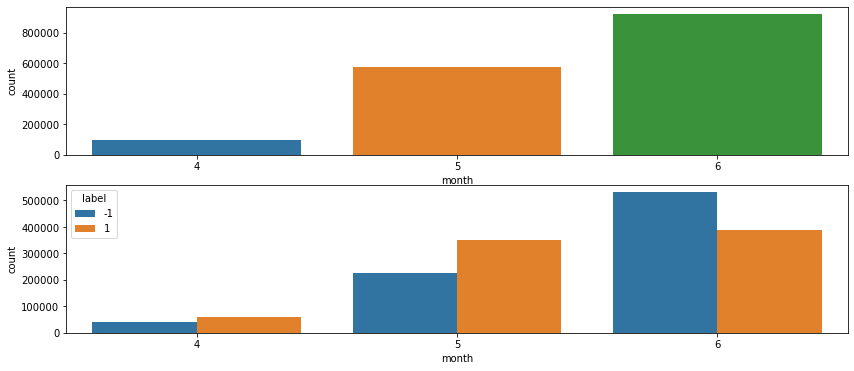

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.subplot(211)
sns.countplot(x="month", data=df)
plt.subplot(212)
sns.countplot(x="month", hue='label', data=df)

Nous remarquons ici, que les tweets ont été extraits beaucoup plus dans le mois 5 et 6.

- Afficher le nombre de tweets en fonction du jour de la semaine sous forme d'un graphique à barres.
- Afficher le nombre de tweets en fonction du jour de la semaine et du sentiment (label) sous forme d'un graphique à barres.

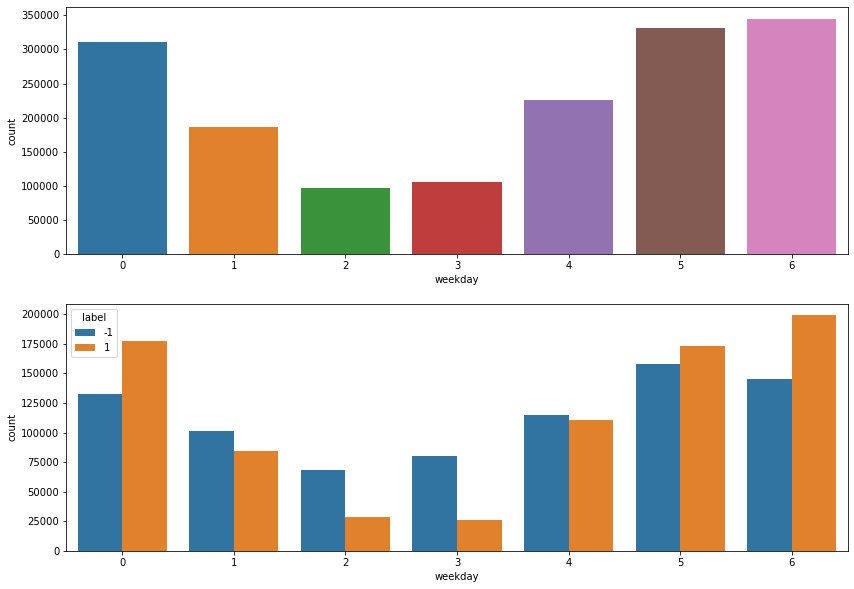

In [25]:
plt.figure(figsize=(14, 10))
plt.subplot(211)
sns.countplot(x="weekday", data=df)
plt.subplot(212)
sns.countplot(x="weekday", hue='label', data=df);

Nous remarquons ici que les utilisateurs utilisent mois Twitter en milieu de semaine, et c'est surtout pour être négatif.

- Afficher le nombre de tweets en fonction de l'heure sous forme d'un graphique à barres.
- Afficher le nombre de tweets en fonction de l'heure et du sentiment (label) sous forme d'un graphique à barres.

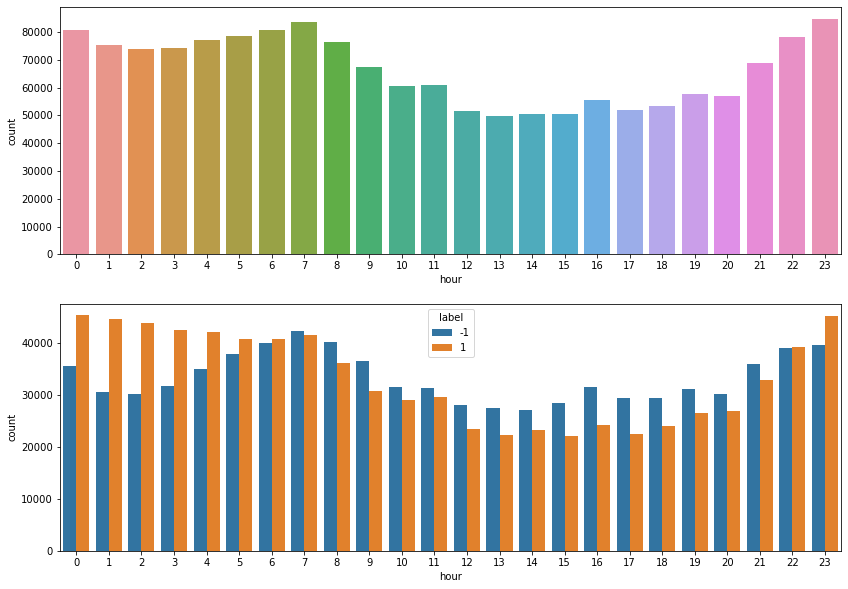

In [26]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x = "hour",data=df)
plt.subplot(212)
sns.countplot(x= "hour",hue='label',data=df);

## information des textes
Dans la partie précédente, nous avons afficher quelques relations interessantes sur la date de publication. Nous allons maintenant nous intéresser au texte.

Lorsque vous scrapez des tweets à l'aide de l'api de twitter, l'api va également extraire les retweets. Les retweets commencent tous par "RT" suivi du tweet. Il est très souvent judicieux d'enlever les retweets pour éviter d'avoir des doublons.

- Exécuter la cellule suivante pour vérifier si il y'a des retweets dans notre jeu de données.

In [27]:
import re
count = 0
for tweet in df.text :
    if tweet[:2]=='RT':
        count += 1
            
count

0

## Metadonnée + preprocessing
Il est très souvent judicieux d'enlever les éléments qui n'auront pas d'importance pour classifier le sentiment d'un tweet. Le nom de l'adresse mail en lui-même ne devrait donner aucune information sur le sentiment du tweet, on pourrait donc appliquer une règle d'expression pour les enlever. Mais, le nombre d'adresse mail cité dans le tweet pourrait avoir une importance concernant le sérieux du tweet.

- Extraire les adresses mails de la variable à l'aide d'une règle d'expression.
- Remplacer les adresses mail par la chaine de caractère "mail".

In [28]:
text = "from : contact@datascientest.com \n to : help@gmail.com \n cc: help@yahoo.fr et contact@datascientest.fr"
r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
print(r.findall(text))
print(r.sub('mail', text))

['contact@datascientest.com', 'help@gmail.com', 'help@yahoo.fr', 'contact@datascientest.fr']
from : mail 
 to : mail 
 cc: mail et mail


Pour analyser le sentiment d'un tweet, nous pouvons alors extraire :

- Le nombre de lien "http(s)" ou "www.".
- Le nombre d'adresse mail.
- Le nombre d'hashtag.
- Le nombre de citation d'utilisateur.
- Le nombre de lettre en majuscule.
- Le nombre de chaine lettre en majuscule.
- Le nombre de point d'exclamation.
- Le nombre de chaîne de point d'exclamation.
- Le nombre de point d'interrogation.
- Le nombre de chaîne de point d'interrogation.
- Le nombre de point ect (...).

- Exécuter la cellule suivante pour définir les fonctions d'extractions de données et de pré-processing

## fonctions find et remove x 14

In [29]:
# Remote function
def removeLink(tweet):
    r1 = re.compile(r"https?://[a-zA-Z0-9./]+")
    links = r1.findall(tweet)
    tweet = r1.sub('', tweet)
    r2 = re.compile(r"www\.[a-zA-Z0-9.-:/]+")
    links += r2.findall(tweet)
    return r2.sub('', tweet)

def removeMail(tweet):
    r = re.compile(r"[a-zA-Z0-9.-]+@[a-zA-Z.]+")
    mails = r.findall(tweet)
    return r.sub('', tweet)

def replaceHashtag(tweet):
    r = re.compile(r"#[a-zA-Z0-9]+")
    hashtag = r.findall(tweet)
    tweet = tweet.replace('#', '_')
    return r.sub('_', tweet)

def removeQuote(tweet):
    r = re.compile(r"@[a-zA-Z0-9]+")
    quote = r.findall(tweet)
    return r.sub('', tweet)


# Find function
def findLink(tweet):
    r1 = re.compile(r"https?://[a-zA-Z0-9./]+")
    links = r1.findall(tweet)
    r2 = re.compile(r"www\.[a-zA-Z0-9.-:/]+")
    links += r2.findall(tweet)
    return len(links)

def findMail(tweet):
    r = re.compile(r"[a-zA-Z0-9.-]+@[a-zA-Z.]+")
    mails = r.findall(tweet)
    return len(mails)


def findQuote(tweet):
    r = re.compile(r"@[a-zA-Z0-9]+")
    quote = r.findall(tweet)
    return len(quote)

def findHashtag(tweet):
    r = re.compile(r"#[a-zA-Z0-9]+")
    hashtag = r.findall(tweet)
    return len(hashtag)

def findCAPSLOCK(tweet):
    r = re.compile(r"[A-Z]")
    capslock = r.findall(tweet)
    return len(capslock)

def find_chain_CAPSLOCK(tweet):
    r = re.compile(r"[A-Z]{2,}")
    capslock = r.findall(tweet)
    return len(capslock)

def find_exclamation(tweet):
    r = re.compile(r"\!")
    exclamation = r.findall(tweet)
    return len(exclamation)

def find_chain_exclamation(tweet):
    r = re.compile(r"\!{2,}")
    exclamation = r.findall(tweet)
    return len(exclamation)

def find_interogation(tweet):
    r = re.compile(r"\?")
    interogation = r.findall(tweet)
    return len(interogation)

def find_etc(tweet):
    r = re.compile(r"\.{2,}")
    etc = r.findall(tweet)
    return len(etc)

- Appliquer les transformations ci-dessus à df.

In [30]:
# Links
df['links'] = df.text.apply(lambda x: findLink(x))
df.text = df.text.apply(lambda x: removeLink(x))
# Mails
df['mails'] = df.text.apply(lambda x: findMail(x))
df.text = df.text.apply(lambda x: removeMail(x))
# Quotes
df['quotes'] = df.text.apply(lambda x: findQuote(x))
df.text = df.text.apply(lambda x: removeQuote(x))
# Hastags
df['hashtags'] = df.text.apply(lambda x: findHashtag(x))
df.text = df.text.apply(lambda x: replaceHashtag(x))
# Others
df['capslock'] = df.text.apply(lambda x: findCAPSLOCK(x))
df['chain_capslock'] = df.text.apply(lambda x: find_chain_CAPSLOCK(x))
df['exclamation'] = df.text.apply(lambda x: find_exclamation(x))
df['chain_exclamation'] = df.text.apply(lambda x: find_chain_exclamation(x))
df['interogation'] = df.text.apply(lambda x: find_interogation(x))
df['etc'] = df.text.apply(lambda x: find_etc(x))
df['nb_caracter'] = df.text.apply(len)
df.head()

,label,tweet_id,date,query,user_name,text,year,month,weekday,hour,links,mails,quotes,hashtags,capslock,chain_capslock,exclamation,chain_exclamation,interogation,etc,nb_caracter
0,-1,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",2009,4,0,22,1,0,1,0,7,0,0,0,0,0,80
1,-1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,2009,4,0,22,0,0,0,0,3,0,1,0,0,1,111
2,-1,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,I dived many times for the ball. Managed to save 50% The rest go out of bounds,2009,4,0,22,0,0,1,0,3,0,0,0,0,0,80
3,-1,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,0,22,0,0,0,0,0,0,0,0,0,0,47
4,-1,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",2009,4,0,22,0,0,1,0,1,0,0,0,1,0,95


## regrouper et sommer chaque colonne en fonction du label.

In [32]:
df[['links', 'mails', 'quotes', 'hashtags', 'label', 'capslock', 'chain_capslock', 'exclamation', 'chain_exclamation', 'interogation', 'nb_caracter']].groupby(['label']).sum()

,links,mails,quotes,hashtags,capslock,chain_capslock,exclamation,chain_exclamation,interogation,nb_caracter
label,,,,,,,,,,
-1,26379,676,312813,18366,2158373,215505,385230,62647,117413,55506994
1,55240,1523,467058,25680,2308264,227341,532720,80213,130149,52876757


- Exécuter la cellule suivante pour regrouper et moyenner chaque colonne en fonction du label.

In [33]:
df[['links', 'mails', 'quotes', 'hashtags', 'label', 'capslock', 'chain_capslock', 'exclamation', 'chain_exclamation', 'interogation', 'nb_caracter']].groupby(['label']).mean()

,links,mails,quotes,hashtags,capslock,chain_capslock,exclamation,chain_exclamation,interogation,nb_caracter
label,,,,,,,,,,
-1,0.03,8.45e-04,0.39,0.02,2.70,0.27,0.48,0.08,0.15,69.38
1,0.07,1.90e-03,0.58,0.03,2.89,0.28,0.67,0.10,0.16,66.10


Ici, nous remarquons que si le tweet est composé de lien ou d'adresse mail, il aura tendance à être beaucoup plus positif. Mais, nous remarquons aussi que la plupart des tweets ne possède pas d'adresse mail (environ 1 tweet sur 1000).

## modele regression logistique
- Exécuter la cellule suivante pour entraîner un modèle de régression logitique pour classifier le sentiment d'un tweet. Nous allons utiliser uniquement les metadonnées comme caractéritiques.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataframe = df[['text', 'links', 'mails', 'quotes', 'hashtags', 'capslock', 'chain_capslock', 'exclamation', 'chain_exclamation', 'interogation', 'nb_caracter', 'label']]
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(['text','label'], axis=1), df.label, test_size=0.2, random_state=1234)
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.5959

Il est assez difficile à un modèle de demander de haute performance uniquement sur des metadonnées. Mais, nous pouvons constater que ses metadonnées donnent de l'information sur le sentiment du tweet.

# 2 - Bag of words
Nous allons maintenant essayer d'extraire plus d'information du texte. Mais, nous ne pouvons pas directement travailler avec du texte avec les algorithmes de machine learning.

Il est donc nécessaire de représenter le texte sous forme d'un vecteur traitable par un algorithme de machine learning.

Un modèle simple et efficace pour transformer un texte en vecteur est le modèle Bag-of-Words (ou BoW).  

Le modèle jette toutes informations sur la séquentialité des mots et se concentre uniquement sur l'occurrence de mots dans le document.

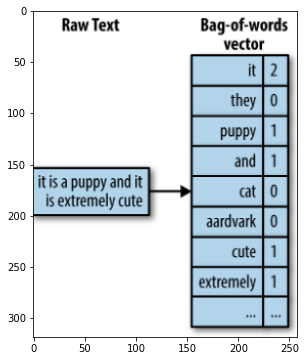

In [36]:
from matplotlib import image
img = image.imread('bag_of_words.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)

Dans la phrase "It is a puppy and it is extremely cute", le mot "it" se trouve 2 fois. Alors, la valeur de l'index du mot "it" (ici l'index du mot est 0) sera 2.

De cette manière, nous pouvons obtenir un vecteur d'occurrence qui représente notre tweet.

## transformer text en vecteur d'occurence + score BernoulliNB

- Exécuter la cellule suivante pour transformer notre text sous forme de vecteur d'occurence.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Split data in train and validate dataset.
df_train, df_test, y_train, y_test = train_test_split(dataframe.drop(['label'], axis=1), df.label, test_size=0.2, random_state=1234)
# Stopword
stopWords = set(stopwords.words('english'))
# Bag of words
vectorizer = CountVectorizer(stop_words=stopWords, max_features=5000)
X_train_text = vectorizer.fit_transform(df_train.text)
X_test_text = vectorizer.transform(df_test.text)

- Exécuter la cellule suivante pour ajouter les metadonnées à notre vecteur d'occurence.

In [38]:
from scipy.sparse import hstack
X_train = hstack((X_train_text, df_train.drop('text', axis=1).values))
X_test = hstack((X_test_text, df_test.drop('text', axis=1).values))

- Exécuter la cellule suivante pour entraîner et afficher le résultat pour un modèle de bernouilli

In [39]:
from sklearn.naive_bayes import BernoulliNB
ber = BernoulliNB()
ber.fit(X_train, y_train)
ber.score(X_test, y_test)

0.760340625

# 3 - POS Tagging
Dans le monde du traitement automatique du langage naturel (NLP), les modèles les plus fondamentaux sont basés sur Bag of Words. Mais de tels modèles ne parviennent pas à saisir les relations syntaxiques entre les mots.

Par exemple, supposons que nous construisions un analyseur de sentiments basé uniquement sur Bag of Words. Un tel modèle ne pourra pas faire la différence entre « I like you », où "like" est un verbe avec un sentiment positif, et « I am like you », où "like" est une préposition avec un sentiment neutre.

L'étiquetage morpho-syntaxique (POS Tagging), autrement appelé étiquetage grammatical, est un processus consistant à associer une étiquette à chaque mot d'un texte. Cette étiquette peut correspondre à la nature grammaticale (nom, adjectif, ...), le genre ou le nombre du mot cible.

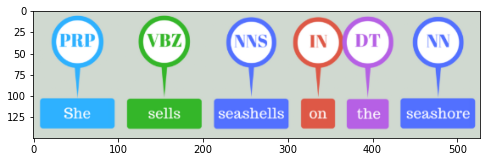

In [40]:
img = image.imread('POS Tagging.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)

Cette tâche n’est pas simple, puisqu'un mot peut avoir plusieurs natures grammaticales. Dans la phrase « Give me your answer », "answer" est un nom, mais dans la phrase « Answer the question », "answer" est un verbe. Le modèle de résolution ne peut donc pas prendre l'hypothèse d'indépendance avec les mots environnants le mot cible.

- Exécuter la cellule suivante pour ajouter à le tag associé à chaque mot.

In [41]:
import nltk
from nltk import word_tokenize, pos_tag, sent_tokenize
# POS Tagging
def POStagging(tweet):  
    text = []
    # Split the tweet on sentence.
    sentences = sent_tokenize(tweet)
    # For each sentence
    for s in sentences:
        # Tokenize the sentence
        wordsList = nltk.word_tokenize(s)
        # Find the right token
        tagged = nltk.pos_tag(wordsList)
        # Convert the list of (token, tag) to token_tag and convert to str
        tagged = ' '.join(map(lambda X: '_'.join(X), tagged))
        text.append(tagged)
    return ' '.join(text)

print(POStagging('I am like you.'))
print(POStagging('I like you.'))

I_PRP am_VBP like_IN you_PRP ._.
I_PRP like_VBP you_PRP ._.


# 4 - Représentation vectorielle des mots
La représentation vectorielle consiste à représenter un mot sous forme d'un vecteur.

## One hot Encoding - tensorflow
La représentation vectorielle la plus classique des mots est le one hot encoding utilisée dans les approches BoW ou TF-IDF. Une dimension est allouée pour chaque mot du vocabulaire. En effet, chaque mot du vocabulaire est représenté comme un vecteur binaire avec toutes ses valeurs nulles à l'exception de l'index du mot.



Pour illustrer l'encodage, prenons la phrase suivante :

- "I think therefore I am"
Nous allons attribuer un indice à chaque mot du vocabulaire. Nous pouvons représenter le vocabulaire sous forme de dictionnaire :

- {'i': 0, 'think': 1, 'therefore': 2, 'am': 3}
La méthode consiste alors à représenter le mot du vocabulaire sous forme de vecteur de dimension 4 (taille du vocabulaire) qui a toutes ses valeurs nulles à l'exception de l'index du mot.

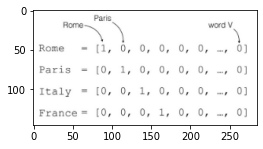

In [43]:
img = image.imread('one_hot_encoding.png')
plt.figure(figsize=(4, 3))
plt.imshow(img)

- Exécuter la cellule suivante pour afficher la représentation one hot du mot "therefore".

In [44]:
import tensorflow as tf
# Dictionary
dictionary = {'i': 0, 'think': 1, 'therefore': 2, 'am': 3}
# One hot representation of "think"
tf.one_hot(dictionary['therefore'], 4).numpy()

ModuleNotFoundError: No module named 'tensorflow'

Avec cette représentation, tous les mots ont la même distance et la même similitude. L'encodage one hot n'apporte donc qu'une information selon laquelle un mot est différent d'un autre.

## Word embedding
Le word embedding est capable en réduisant la dimension de capturer le contexte, la similarité sémantique et syntaxique (genre, synonymes, ...) d'un mot. Par exemple, on pourrait s'attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l'espace vectoriel où sont définis ces vecteurs.

Nous souhaitons que ça soit le modèle qui choisisse les caractéristiques les plus pertinentes représentant le mot. Par exemple, la caractéritique "être vivant" pourrait être intéressante pour différencier "chien" et "ordinateur", et rapprocher "chien" et "chat".

## Matrice d'embedding
Un façon très simple de diminuer la taille d'un vecteur est de le multiplier par un matrice W :

- h=W⋅X
- Avec  X  de taille N et  W  de taille  [N,Nembedding]

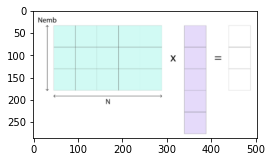

In [45]:
img = image.imread('mat_embedding.png')
plt.figure(figsize=(4, 3))
plt.imshow(img)

In [47]:
""" (Nemb , N)x(N, 1) = (Nemb, 1) """

' (Nemb , N)x(N, 1) = (Nemb, 1) '

Cette opération permet de réduire, compresser, la taille d'un vecteur de taille  N  en un vecteur de taille  Nembedding .

C'est généralement cette méthode d’embedding qui est utilisée pour représenter un mot dans un sous espace vectoriel.   

Dans le cas des mots, la méthode consiste à multiplier une matrice d’embedding  W  par la représentation « one hot » du mot :

hi = ∑(j=1 à Ndim) wij⋅xj

 
Avec  NdimNdim  le nombre de mot du dictionnaire,  xj  la composante  j du vecteur « one hot » du mot.

Sous forme vectorielle :

⟺ h=W⋅X

 
## Word2vec - CBOW Skip-gram
Il est possible d'entraîner la matrice W de manière non supervisé avec simplement du texte à l’aide du célèbre algorithme word2vec.

L'approche de Word2vec repose sur l'un des deux algorithmes suivants: **Common Bag Of Words (CBOW)** ou **Skip-gram.**

Prenons un exemple concret pour expliquer la principale différence entre les deux algorithmes.

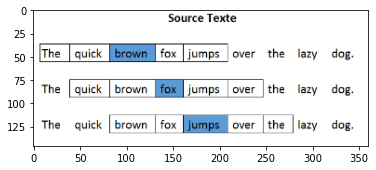

In [49]:
img = image.imread('word2vec.png')
plt.figure(figsize=(6, 4))
plt.imshow(img)

Dans cet exemple, nous avons choisi une fenêtre de taille 5. Le mot dans la case bleu est appelé le mot cible et les mots dans les cases blanches sont appelés mots du contexte.

- L'approche CBOW consiste à prédit le mot cible à partir des mots du contexte.
- L'approche Skip Gram consiste à prédire les mots du contexte à partir du mot cible.

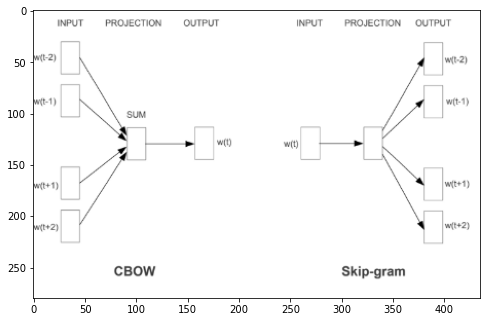

In [51]:
img = image.imread('CBOW_skip-gram.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)

Les deux algorithmes utilisent un **réseau neuronal à 3 couches** (1 couche d'entrée, 1 couche cachée, 1 couche de sortie).  

La figure ci-dessous illustre une manière naïve d'effectuer l'apprentissage d'un modèle CBOW en utilisant une couche softmax de sortie.  

Étant donné la représentation de chaque mot du contexte, le modèle tente de prédire le mot cible le plus probable.   

Ainsi, l'entrée du modèle sont les mots du contexte (case blanche) et la sortie du modèle est une distribution de probabilité de la prédiction de mot cible.

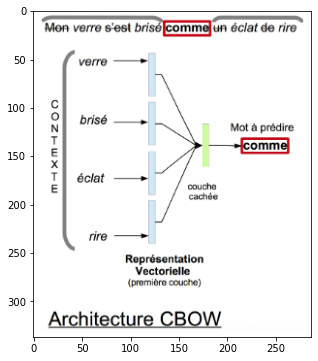

In [52]:
img = image.imread('CBOW.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)

Pour une raison de temps de calcul, nous allons charger une matrice W déjà entrainé à l'aide de la librairie gensim.

- Exécuter la cellule suivante pour charger un word2vec pré-entrainé.

In [57]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-200")

# from gensim.models import Word2Vec
# model = gensim.models.Word2Vec(sentences=review_lines, size=200, window=5, workers=-1, min_count=5)

[=====================================-------------] 74.7% 188.2/252.1MB downloaded

- Exécuter la cellule suivante pour afficher la représentation vectorielle du mot "france".

In [ ]:
model['france'].shape

## Similitude entre 2 mots
Comment mesurer la similitude entre deux mots?
Cosine similarity est généralement utilisée comme métrique pour mesurer la distance lorsque la norme des vecteurs n'a pas d'importance. Cela se produit par exemple lorsque vous travaillez avec des données de texte représentées par le nombre de mots. Cette métrique capture la similitude, la distance entre deux mots. Elle représente la façon dont les mots sont liés les uns aux autres.

Considérons deux mots représentés respectivement par  A=(Ai)  et  B=(Bi)  comme indiqué dans le graphique ci-dessous:

- Ensuite, la similitude entre les deux mots est calculée comme suit:

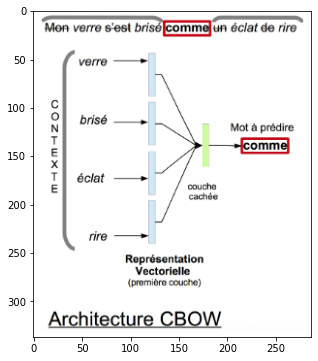

In [54]:
img = image.imread('similitude.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)

- Exécuter la cellule suivante pour afficher les 10 mots les proches de "france".

In [ ]:
model.most_similar('france')

- Exécuter la cellule suivante pour afficher les 10 mots les proches de "femur".

In [ ]:
model.most_similar('femur')

- Exécuter la cellule suivante pour afficher les 10 mots les proches de "amazing".

In [ ]:
model.most_similar('amazing')

## Propriétés arithmétiques
Nous pouvons maintenant nous poser la question si notre sous-espace vectoriel des mots a des propriétés arithmétiques. Prenons le célèbre exemple suivant :

- King − Man + Woman = ??(Answer:Queen)

 
Dans cet exemple la propriété arithmétique est la royauté. Nous souhaitons vérifier si cette propriété va se propager à « woman ». C’est-à-dire que nous allons rechercher les mots les plus proches du vecteur suivant :

- arithmetic_vector = word2vec[index_word1] - word2vec[index_word2] + word2vec [index_word3]

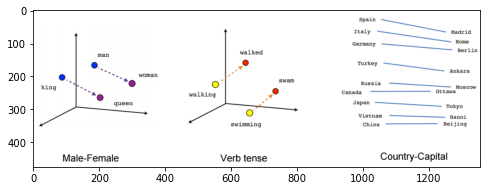

In [55]:
img = image.imread('arithm.png')
plt.figure(figsize=(12, 8))
plt.imshow(img)

- Exécuter la cellule suivante pour afficher les 10 mots les plus proches de  King − Man + Woman .
- idem pour zombies - zombie + soldier  ,  paris - france + italy  ,,  mother - daughter + son

In [ ]:
model.most_similar(positive=['king','woman'], negative=['man'])

In [ ]:
model.most_similar(positive=['zombies','soldier'], negative=['zombie'])

In [ ]:
model.most_similar(positive=['paris','italy'], negative=['france'])

In [ ]:
model.most_similar(positive=['mother','son'], negative=['daughter'])

- En utilisant une ACP, nous pouvons retrouver les dimensions des propriétés arithmétiques.

- Exécuter la cellule suivante pour afficher la dimension de genre (masculin/féminin).

In [ ]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pairs = [('she', 'he'),
('her', 'his'),
('woman', 'man'),
('sister', 'brother'),
('herself', 'himself'),
('daughter', 'son'),
('mother', 'father'),
('girl', 'boy'),
('queen', 'king')]
n = np.shape(pairs)[0]

difference_matrix = np.array([model.word_vec(a[0], use_norm=True)-model.word_vec(a[1], use_norm=True) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model.word_vec(word, use_norm=True) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12,12))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show()

- Exécuter la cellule suivante pour afficher la relation entre capitals et pays

In [ ]:
pairs = [('paris', 'france'),
('rome', 'italy'),
('berlin', 'germany'),
('ankara', 'turkey'),
('moscow', 'russia'),
('ottawa', 'canada'),
('tokyo', 'japan'),
('hanoi', 'vietnam'),
('beijing', 'china'),
('canberra', 'australia'),
('brussels', 'belgium'),
('brasilia', 'brazil'),
('copenhagen', 'denmark'),
('london', 'england'),
('athens', 'greece'),
('lisbon', 'portugal'),
('madrid', 'spain')]

n = np.shape(pairs)[0]

difference_matrix = np.array([model.word_vec(a[0], use_norm=True)-model.word_vec(a[1], use_norm=True) for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[model.word_vec(word, use_norm=True) for word in np.concatenate(pairs)]

coord = pca.fit_transform(words)

print(pca.explained_variance_ratio_)

fig, axes = plt.subplots(figsize=(12,12))
for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))
for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])
plt.show()

# Conclusion
Le "word2vec embedding" capture efficacement les propriétés sémantiques et arithmétiques d'un mot. Il permet également de réduire la dimension du problème et par conséquent la tâche d'apprentissage.

Nous pouvons nous imaginer utiliser l’algorithme word2vec pour pré-entraîner la matrice d’embedding du modèle de sentiment analysis. Par conséquent, notre modèle de classification aura une bien meilleure représentation des mots lors de la phase d’apprentissage des sentiments.